### Dataset: Medical Insurance Cost Dataset (Kaggle)
🔗 https://www.kaggle.com/datasets/mirichoi0218/insurance
🏥 Business Scenario
You are working as a Data Analyst for a health insurance company.
The company provides insurance policies to thousands of customers every year. Recently, management observed that insurance claim costs are increasing, but they are not sure which customer factors are driving the cost the most.
🎯 Business Goal
The company wants to:
Identify the key factors that increase medical insurance charges

so they can:
Design risk-based premium plans
Reduce losses caused by high-risk customers
Create fair pricing strategies for customers
Your task is to use Multiple Linear Regression to support this decision.
📁 Dataset Reality (Messy Data)
The dataset contains real-world problems:
Some important columns are categorical (not numeric)
Certain customer attributes are text-based
One column represents geographical regions
Numerical features have very different value ranges
Some variables may be strongly related to each other
The data cannot be used directly for regression.
 Medical Cost Personal Datasets | Kaggle
Insurance Forecast by using Linear Regression
 

In [21]:
# 1) Data Preprocessing - Code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

 
dataset = pd.read_csv(r"/Users/anusreereddysama/Desktop/TECHWORKS/week-9/insurance.csv")
print('Dataset shape:', dataset.shape)
display(dataset.head())
 
# Separate features and target
X = dataset.iloc[:, :-1].values  # all columns except last (Profit)
y = dataset.iloc[:, -1].values   # last column (Profit)
 
print('\nFeature preview (first 5 rows):')
print(X[:5])
 
# Encode categorical 'State' column (index 3)
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5])], remainder='passthrough')
X_encoded = ct.fit_transform(X)
 
# Convert to numpy array and inspect
X = np.array(X_encoded)
print('\nAfter OneHotEncoding, feature shape:', X.shape)
print('\nFirst 5 rows after encoding:')
print(X[:5])
 
 

Dataset shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Feature preview (first 5 rows):
[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 [33 'male' 22.705 0 'no' 'northwest']
 [32 'male' 28.88 0 'no' 'northwest']]

After OneHotEncoding, feature shape: (1338, 11)

First 5 rows after encoding:
[[1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 19 27.9 0]
 [0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 18 33.77 1]
 [0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 28 33.0 3]
 [0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 33 22.705 0]
 [0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 32 28.88 0]]


In [22]:
# 2) Fit Model - Code
# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])
 
# Train the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
 
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))
 

Training samples: 1070
Test samples: 268
Intercept: -517.1368358424606
Number of coefficients: 11


In [24]:
# 3) Predict - Code
# Predicting Test set results
y_pred = regressor.predict(X_test)
 
# Compare Actual vs Predicted
comparison = pd.DataFrame({
    'Actual Charges': y_test,
    'Predicted Charges ': np.round(y_pred,2)
})
display(comparison.reset_index(drop=True))
 
 

,Actual Charges,Predicted Charges
0,9724.53000,11169.93
1,8547.69130,9486.71
2,45702.02235,38181.12
3,12950.07120,16266.31
4,9644.25250,6914.65
...,...,...
263,15019.76005,14760.23
264,6664.68595,8277.98
265,20709.02034,16149.97
266,40932.42950,32904.76


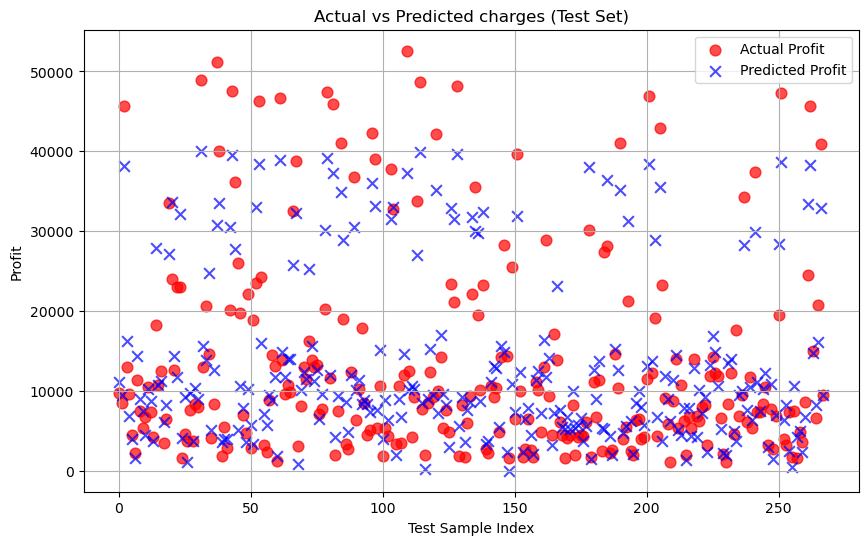

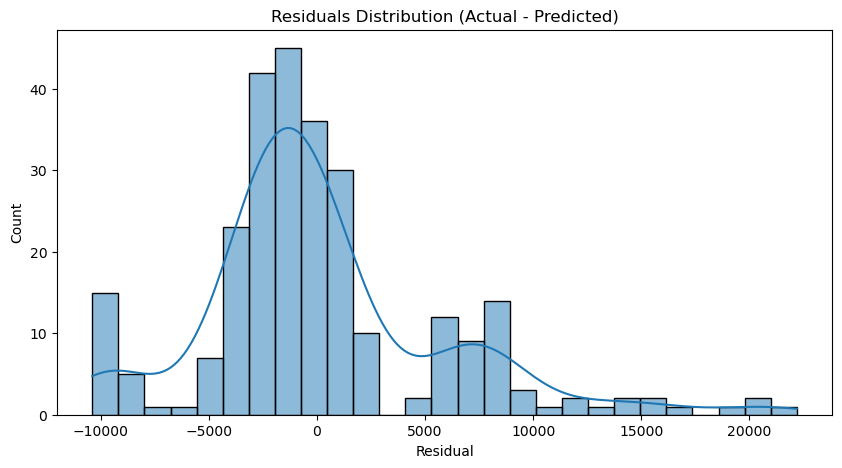

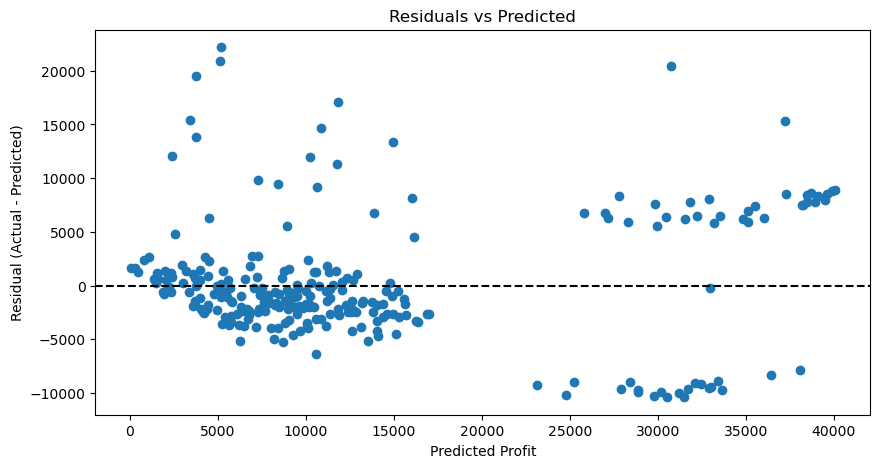

In [26]:
# 4) Visualization - Code
# Visualization: Actual vs Predicted  (scatter)
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Profit', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Profit', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted charges (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Profit')
plt.legend()
plt.grid("on")
plt.show()
 
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.show()
 
# Residuals vs Predicted (to check heteroscedasticity)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()
 
 

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
mse = mean_squared_error(y_test, y_pred)
 
r2 = r2_score(y_test, y_pred)
 
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error (MSE): 31827950.23
R^2 Score: 0.8000
